In [ ]:
import kagglehub

path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [ ]:
import os
csv_path = "/kaggle/input/amazon-fine-food-reviews/Reviews.csv"
print("CSV exists:", os.path.exists(csv_path))
# Показать первые несколько строк
if os.path.exists(csv_path):
    with open(csv_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f):
            print(line.strip())
            if i >= 4:
                break
else:
    print("Помести Reviews.csv рядом с ноутбуком или пропиши путь csv_path.")


CSV exists: True
Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and 

In [ ]:
# Mapper / Shuffle / Reducer emulation
import csv
from collections import defaultdict, Counter
import pandas as pd
from tqdm.auto import tqdm

def mapper1_row(row):
    """Возвращает (product_id, score) или None"""
    pid = row.get("ProductId")
    sc = row.get("Score")
    if not pid or not sc:
        return None
    try:
        s = int(sc)
        return pid, s
    except:
        return None

# Читаем CSV построчно и запускаем mapper
intermediate = defaultdict(list)
with open(csv_path, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in tqdm(reader, desc="Mapping"):
        out = mapper1_row(row)
        if out:
            pid, s = out
            intermediate[pid].append(s)

# Применяем reducer
reduced_rows = []
for pid, scores in tqdm(intermediate.items(), desc="Reducing"):
    total = len(scores)
    avg = sum(scores) / total if total > 0 else 0.0
    dist = Counter(scores)
    reduced_rows.append({
        "ProductId": pid,
        "AvgScore": avg,
        "TotalReviews": total,
        "Score1": dist.get(1,0),
        "Score2": dist.get(2,0),
        "Score3": dist.get(3,0),
        "Score4": dist.get(4,0),
        "Score5": dist.get(5,0)
    })

df_mapreduce = pd.DataFrame(reduced_rows)
df_mapreduce.head()


Mapping: 0it [00:00, ?it/s]

Reducing:   0%|          | 0/74258 [00:00<?, ?it/s]

,ProductId,AvgScore,TotalReviews,Score1,Score2,Score3,Score4,Score5
0,B001E4KFG0,5.00,1,0,0,0,0,1
1,B00813GRG4,1.00,1,1,0,0,0,0
2,B000LQOCH0,4.00,1,0,0,0,1,0
3,B000UA0QIQ,2.00,1,0,1,0,0,0
4,B006K2ZZ7K,4.75,4,0,0,0,1,3


In [ ]:
df_filtered = df_mapreduce[df_mapreduce["TotalReviews"] > 100].copy()
df_top50_mapreduce = df_filtered.sort_values(by="AvgScore", ascending=False).head(50).reset_index(drop=True)
df_top50_mapreduce


,ProductId,AvgScore,TotalReviews,Score1,Score2,Score3,Score4,Score5
0,B000ED9L9E,4.973451,113,0,0,1,1,111
1,B000O5DI1E,4.906542,107,0,0,2,6,99
2,B000NMJWZO,4.881919,542,3,3,9,25,502
3,B003QDRJXY,4.837121,264,3,3,4,14,240
4,B003KRHDMI,4.833333,132,0,2,4,8,118
5,B007R900WA,4.823529,170,0,1,6,15,148
6,B004EAGP74,4.802057,389,4,1,13,32,339
7,B000GAT6NG,4.802057,389,4,1,13,32,339
8,B001E8DHPW,4.802057,389,4,1,13,32,339
9,B000ET4SM8,4.801136,176,2,2,4,13,155


In [ ]:
out_csv = "top50_mapreduce.csv"
out_parquet = "top50_mapreduce.parquet"
df_top50_mapreduce.to_csv(out_csv, index=False)
df_top50_mapreduce.to_parquet(out_parquet, index=False)
print("Saved:", out_csv, out_parquet)


Saved: top50_mapreduce.csv top50_mapreduce.parquet


In [ ]:
import duckdb

con = duckdb.connect(database=':memory:')
# Создаём виртуальную таблицу на CSV (DuckDB читает CSV напрямую)
con.execute(f"""
CREATE VIEW reviews AS
SELECT *
FROM read_csv_auto('{csv_path}', header=True)
""")

# Выполним SQL аналог агрегации (как в Hive)
sql = """
CREATE VIEW product_stats AS
SELECT
  ProductId,
  AVG(CAST(Score AS DOUBLE)) AS avg_score,
  COUNT(*) AS total_reviews,
  SUM(CASE WHEN CAST(Score AS INTEGER)=1 THEN 1 ELSE 0 END) AS score1,
  SUM(CASE WHEN CAST(Score AS INTEGER)=2 THEN 1 ELSE 0 END) AS score2,
  SUM(CASE WHEN CAST(Score AS INTEGER)=3 THEN 1 ELSE 0 END) AS score3,
  SUM(CASE WHEN CAST(Score AS INTEGER)=4 THEN 1 ELSE 0 END) AS score4,
  SUM(CASE WHEN CAST(Score AS INTEGER)=5 THEN 1 ELSE 0 END) AS score5
FROM reviews
GROUP BY ProductId
"""
con.execute(sql)

# Top50
res = con.execute("""
SELECT ProductId, avg_score, total_reviews, score1,score2,score3,score4,score5
FROM product_stats
WHERE total_reviews > 100
ORDER BY avg_score DESC
LIMIT 50
""").df()

res.head(10)


,ProductId,avg_score,total_reviews,score1,score2,score3,score4,score5
0,B000ED9L9E,4.973451,113,0.0,0.0,1.0,1.0,111.0
1,B000O5DI1E,4.906542,107,0.0,0.0,2.0,6.0,99.0
2,B000NMJWZO,4.881919,542,3.0,3.0,9.0,25.0,502.0
3,B003QDRJXY,4.837121,264,3.0,3.0,4.0,14.0,240.0
4,B003KRHDMI,4.833333,132,0.0,2.0,4.0,8.0,118.0
5,B007R900WA,4.823529,170,0.0,1.0,6.0,15.0,148.0
6,B000GAT6NG,4.802057,389,4.0,1.0,13.0,32.0,339.0
7,B001E8DHPW,4.802057,389,4.0,1.0,13.0,32.0,339.0
8,B004EAGP74,4.802057,389,4.0,1.0,13.0,32.0,339.0
9,B000ET4SM8,4.801136,176,2.0,2.0,4.0,13.0,155.0


In [ ]:
res.to_csv("top50_duckdb.csv", index=False)
res.to_parquet("top50_duckdb.parquet", index=False)
print("Saved top50 via SQL: top50_duckdb.csv / parquet")


Saved top50 via SQL: top50_duckdb.csv / parquet


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

spark = SparkSession.builder.appName("FineFoodReviews").getOrCreate()

schema = StructType([
    StructField("Id", IntegerType(), True),
    StructField("ProductId", StringType(), True),
    StructField("UserId", StringType(), True),
    StructField("ProfileName", StringType(), True),
    StructField("HelpfulnessNumerator", IntegerType(), True),
    StructField("HelpfulnessDenominator", IntegerType(), True),
    StructField("Score", DoubleType(), True),
    StructField("Time", IntegerType(), True),
    StructField("Summary", StringType(), True),
    StructField("Text", StringType(), True)
])

df = spark.read.csv(
    csv_path,
    header=True,
    schema=schema,
    mode="DROPMALFORMED"
)

df.show(5)
df.printSchema()


+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+
| Id| ProductId|        UserId|         ProfileName|HelpfulnessNumerator|HelpfulnessDenominator|Score|      Time|             Summary|                Text|
+---+----------+--------------+--------------------+--------------------+----------------------+-----+----------+--------------------+--------------------+
|  1|B001E4KFG0|A3SGXH7AUHU8GW|          delmartian|                   1|                     1|  5.0|1303862400|Good Quality Dog ...|I have bought sev...|
|  2|B00813GRG4|A1D87F6ZCVE5NK|              dll pa|                   0|                     0|  1.0|1346976000|   Not as Advertised|"Product arrived ...|
|  4|B000UA0QIQ|A395BORC6FGVXV|                Karl|                   3|                     3|  2.0|1307923200|      Cough Medicine|If you are lookin...|
|  5|B006K2ZZ7K|A1UQRSCLF8GW1T|"Michael D. Bigha...|            

In [ ]:
from pyspark.sql import functions as F

agg = df.groupBy("ProductId").agg(
    F.count("*").alias("TotalReviews"),
    F.avg("Score").alias("AvgScore"),
    F.sum(F.when(F.col("Score") == 1, 1).otherwise(0)).alias("Score_1"),
    F.sum(F.when(F.col("Score") == 2, 1).otherwise(0)).alias("Score_2"),
    F.sum(F.when(F.col("Score") == 3, 1).otherwise(0)).alias("Score_3"),
    F.sum(F.when(F.col("Score") == 4, 1).otherwise(0)).alias("Score_4"),
    F.sum(F.when(F.col("Score") == 5, 1).otherwise(0)).alias("Score_5")
)

top50_spark = agg.filter("TotalReviews > 100").orderBy(F.col("AvgScore").desc()).limit(50)

top50_spark.show(50)


+----------+------------+------------------+-------+-------+-------+-------+-------+
| ProductId|TotalReviews|          AvgScore|Score_1|Score_2|Score_3|Score_4|Score_5|
+----------+------------+------------------+-------+-------+-------+-------+-------+
|B000ED9L9E|         113|4.9734513274336285|      0|      0|      1|      1|    111|
|B000GAT6NG|         389| 4.953727506426735|      4|      1|     13|     32|    337|
|B004EAGP74|         389| 4.953727506426735|      4|      1|     13|     32|    337|
|B001E8DHPW|         389| 4.953727506426735|      4|      1|     13|     32|    337|
|B000O5DI1E|         107| 4.906542056074766|      0|      0|      2|      6|     99|
|B000NMJWZO|         542| 4.872693726937269|      3|      3|      9|     25|    501|
|B003QDRJXY|         264| 4.837121212121212|      3|      3|      4|     14|    240|
|B003KRHDMI|         132| 4.833333333333333|      0|      2|      4|      8|    118|
|B007R900WA|         170| 4.823529411764706|      0|      1|     

In [ ]:
# Преобразуем результат Spark в Pandas
top50_local = top50_spark.toPandas()
top50_local.head()


,ProductId,TotalReviews,AvgScore,Score_1,Score_2,Score_3,Score_4,Score_5
0,B000ED9L9E,113,4.973451,0,0,1,1,111
1,B000GAT6NG,389,4.953728,4,1,13,32,337
2,B004EAGP74,389,4.953728,4,1,13,32,337
3,B001E8DHPW,389,4.953728,4,1,13,32,337
4,B000O5DI1E,107,4.906542,0,0,2,6,99


In [ ]:
# DAG код
airflow_dag_code = '''
from airflow import DAG
from airflow.providers.apache.spark.operators.spark_submit import SparkSubmitOperator
from airflow.providers.apache.hive.operators.hive import HiveOperator
from airflow.operators.bash import BashOperator
from datetime import datetime, timedelta

default_args = {
  "owner": "student",
  "start_date": datetime(2025,1,1),
  "retries": 1,
  "retry_delay": timedelta(minutes=5)
}

with DAG("lab3_amazon_top50", default_args=default_args, schedule_interval="@daily", catchup=False) as dag:
    run_spark = SparkSubmitOperator(
        task_id="spark_top50",
        application="/opt/airflow/dags/spark_top50.py",
        name="spark_amazon_top50"
    )
    load_hive = HiveOperator(
        task_id="load_hive",
        hql="CREATE EXTERNAL TABLE ... LOCATION '/output/...'"
    )
    archive = BashOperator(task_id="archive", bash_command="hdfs dfs -cp ...")
    run_spark >> load_hive >> archive
'''
print(airflow_dag_code[:700], "... (truncated)")



from airflow import DAG
from airflow.providers.apache.spark.operators.spark_submit import SparkSubmitOperator
from airflow.providers.apache.hive.operators.hive import HiveOperator
from airflow.operators.bash import BashOperator
from datetime import datetime, timedelta

default_args = {
  "owner": "student",
  "start_date": datetime(2025,1,1),
  "retries": 1,
  "retry_delay": timedelta(minutes=5)
}

with DAG("lab3_amazon_top50", default_args=default_args, schedule_interval="@daily", catchup=False) as dag:
    run_spark = SparkSubmitOperator(
        task_id="spark_top50",
        application="/opt/airflow/dags/spark_top50.py",
        name="spark_amazon_top50"
    )
    load_hive = HiveOpera ... (truncated)


In [ ]:
# Симуляция: "запускаем" Spark-агрегацию из блока 7 и затем "кладём" результат в витрину (Parquet)
def simulated_pipeline_run():
    # используем top50_local из блока Spark
    if 'top50_local' in globals():
        top50_local.to_parquet("data_vitrine/top50_latest.parquet", index=False)
        print("Pipeline: saved to data_vitrine/top50_latest.parquet")
    else:
        print("Run Spark block first (block 7) to produce top50_local.")

# Создадим папку для витрины
import os
os.makedirs("data_vitrine", exist_ok=True)
simulated_pipeline_run()


Pipeline: saved to data_vitrine/top50_latest.parquet


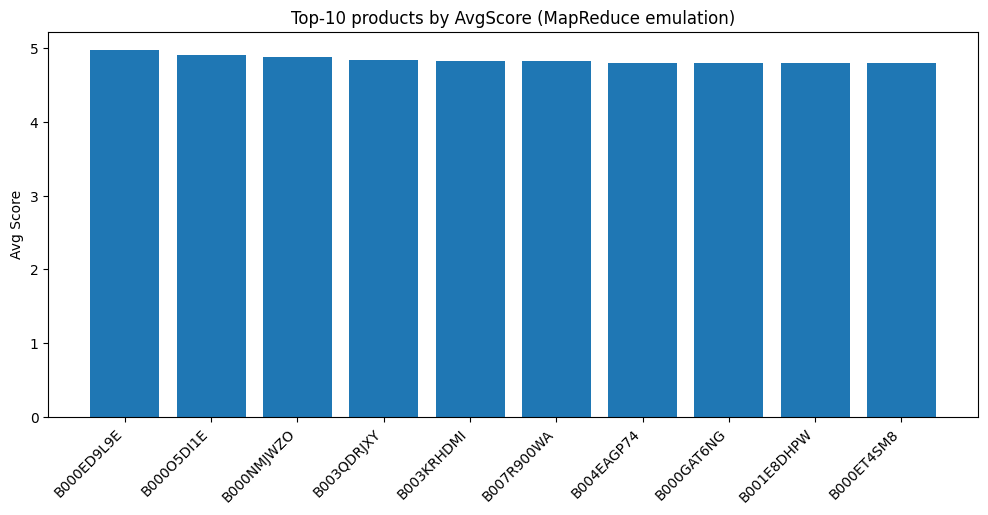

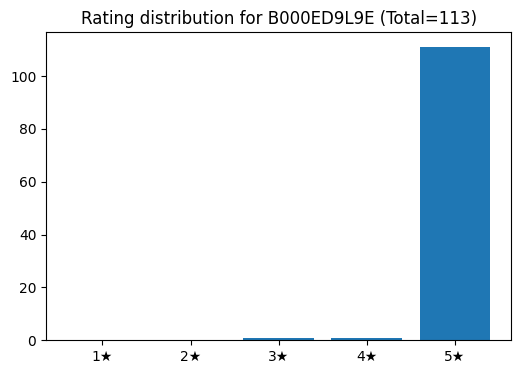

In [ ]:
import matplotlib.pyplot as plt

# Берём top 10 из MapReduce (или Spark — они должны совпадать)
top10 = df_top50_mapreduce.head(10).copy()

plt.figure(figsize=(12,5))
plt.bar(top10["ProductId"].astype(str), top10["AvgScore"])
plt.ylabel("Avg Score")
plt.title("Top-10 products by AvgScore (MapReduce emulation)")
plt.xticks(rotation=45, ha='right')
plt.show()

# Показать распределение для первого продукта
first = top10.iloc[0]
scores = [first["Score1"], first["Score2"], first["Score3"], first["Score4"], first["Score5"]]
labels = ['1★','2★','3★','4★','5★']
plt.figure(figsize=(6,4))
plt.bar(labels, scores)
plt.title(f"Rating distribution for {first['ProductId']} (Total={first['TotalReviews']})")
plt.show()


In [ ]:
print("MapReduce top50 count:", len(df_top50_mapreduce))
print("DuckDB top50 count:", len(res))
print("Spark top50 count:", len(top50_local))

print("\nПервых 5 ProductId (MapReduce):")
print(df_top50_mapreduce['ProductId'].head())

print("\nПервых 5 ProductId (DuckDB):")
print(res['ProductId'].head())

print("\nПервых 5 ProductId (Spark):")
print(top50_local['ProductId'].head())


MapReduce top50 count: 50
DuckDB top50 count: 50
Spark top50 count: 50

Первых 5 ProductId (MapReduce):
0    B000ED9L9E
1    B000O5DI1E
2    B000NMJWZO
3    B003QDRJXY
4    B003KRHDMI
Name: ProductId, dtype: object

Первых 5 ProductId (DuckDB):
0    B000ED9L9E
1    B000O5DI1E
2    B000NMJWZO
3    B003QDRJXY
4    B003KRHDMI
Name: ProductId, dtype: object

Первых 5 ProductId (Spark):
0    B000ED9L9E
1    B000GAT6NG
2    B004EAGP74
3    B001E8DHPW
4    B000O5DI1E
Name: ProductId, dtype: object
